In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Activation Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x): #derivative of sigmoid
    return (1 - sigmoid(x)) * sigmoid(x)

# Loss Functions 
def logloss(y, a):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a): # derivative of logloss
    return (a - y)/(a*(1 - a))	

In [24]:
# The layer class
class Layer:

    activationFunction = {
        'sigmoid': (sigmoid, d_sigmoid)
    }
    learning_rate = 0.5

    def __init__(self, inputs, neurons, activation): # This function  take inputs, number of neurons and activation function (sigmoid) 
        self.W = np.random.randn(neurons, inputs) # randomizing weights 
        self.b = np.zeros((neurons, 1)) #bias 
        self.act, self.d_act = self.activationFunction.get(activation)

    def feedforward(self, A_prev): # feedforward function which takes output of previous layer as input
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b # calculates z 
        self.A = self.act(self.Z) # sigmoid activation function is used on value of z to predict output
        return self.A

    def backprop(self, dA): #back propagation function, all variables starting with 'd' are partial derivatives wrt cost
        dZ = np.multiply(self.d_act(self.Z), dA) 
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return dA_prev

In [25]:
x_input= np.array([[1, 1, 1, 1,0,0,0,0], [1, 1, 0, 0,1,1,0,0],[1,0,1,0,1,0,1,0]]) # dim x m

In [16]:
y_output = np.array([[1, 1, 1, 1,1,1,1,0]]) # 1 x m , OR DATA

In [26]:
y_output = np.array([[0, 1, 1, 1,1,1,1,0]]) # 1 x m ,XOR DATA

In [29]:
m = 8 # total dataset 
epochs = 2000

layers = [Layer(3, 4, 'sigmoid'), Layer(4, 1, 'sigmoid')] # we define our(layer 1 of 4 neurons and 3 inputs) and (layer 2 with 1 neuron and 4 inputs) from previous layer's neurons
costs = [] # to plot graph 

for epoch in range(epochs): 
    A = x_input
    for layer in layers:
        A = layer.feedforward(A)

    cost = 1/m * np.sum(logloss(y_output, A))
    costs.append(cost)
    print("Cost for epoch {0} : {1}".format(epoch,cost))  # cost for every epoch is printed.

    dA = d_logloss(y_output, A)
    for layer in reversed(layers): # backpropagation 
        dA = layer.backprop(dA)


# Making predictions
A = x_input
for layer in layers:
    A = layer.feedforward(A)

print(np.around(A)) # Printing Final prediction

Cost for epoch 0 : 0.6340178919798771
Cost for epoch 1 : 0.6137236870419593
Cost for epoch 2 : 0.5991716913319949
Cost for epoch 3 : 0.5889797196903206
Cost for epoch 4 : 0.5819485694742099
Cost for epoch 5 : 0.5771208733644806
Cost for epoch 6 : 0.5737809641586085
Cost for epoch 7 : 0.5714208368292425
Cost for epoch 8 : 0.5696941710537459
Cost for epoch 9 : 0.5683721305865669
Cost for epoch 10 : 0.5673070713328863
Cost for epoch 11 : 0.5664054214611326
Cost for epoch 12 : 0.565608641223551
Cost for epoch 13 : 0.5648804247019715
Cost for epoch 14 : 0.5641983619763424
Cost for epoch 15 : 0.5635486298795276
Cost for epoch 16 : 0.5629226678177925
Cost for epoch 17 : 0.5623151223778499
Cost for epoch 18 : 0.5617225882197943
Cost for epoch 19 : 0.56114284204743
Cost for epoch 20 : 0.5605743788781781
Cost for epoch 21 : 0.5600161322814834
Cost for epoch 22 : 0.5594673059584824
Cost for epoch 23 : 0.5589272724331653
Cost for epoch 24 : 0.5583955120750813
Cost for epoch 25 : 0.5578715763090679

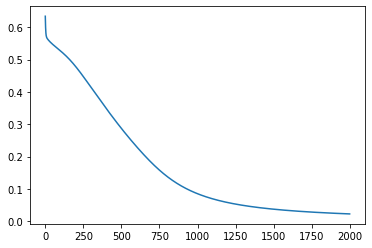

In [30]:
plt.plot(range(epochs), costs)